In [1]:
# Importing the necessary libraries for data analysis

import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# The dataset is downloaded from Kaggle and laoded using pandas
df = pd.read_csv('911.csv')

In [6]:
# First information in the dataset explored like the columns that are present and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [7]:
# Some of the columns are renamed for better understanding
df.rename(columns={'twp': 'township', 'addr': 'address', 'desc':'description'}, inplace=True)

In [8]:
df.head()

,lat,lng,description,zip,title,timeStamp,township,address,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [9]:
df.isnull().sum()

lat                0
lng                0
description        0
zip            12855
title              0
timeStamp          0
township          43
address          519
e                  0
dtype: int64

In [ ]:
# Few questions are answered to gain insights from the data

In [17]:
# What are the top 10 zipcode based on the number of 911 emergency calls?
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [18]:
# What are the top 10 townships where there were most number of 911 emergency calls?
df['township'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: township, dtype: int64

In [19]:
# Based on the number of unique titles it is hard to categorically analyse the data
# But when looked closely all the data in title column have one of the three main categories
df['title'].nunique()

110

In [20]:
# A new column named reason is created by extracting information from the title column using lambda function
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [21]:
# Now we have three unique categories of calls, this makes it easier to analyse and derive insights from the data
df['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [22]:

df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

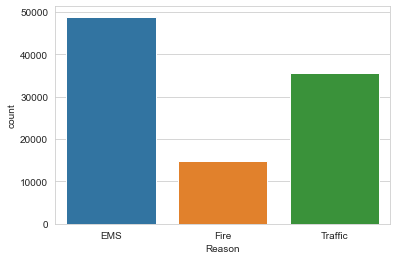

In [24]:
# From the countplot we can identify that EMS calls were the most followed by traffic and fire
sns.countplot(x='Reason',data=df)

In [25]:
# The data type of timestamp is string
type(df['timeStamp'].iloc[0])

str

In [26]:
# Timestamp data type is converted using date time function
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [32]:
# To derive insights based on hour, month, day of week new columns are created 
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [33]:
df.head()

,lat,lng,description,zip,title,timeStamp,township,address,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [34]:
# Since day of week is numerical it is mapped as per the corresponding day to gain meaningful insights
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [35]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [36]:
df.head()

,lat,lng,description,zip,title,timeStamp,township,address,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


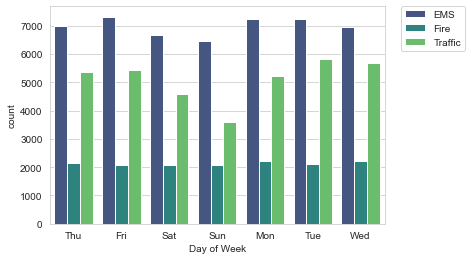

In [38]:
# Countplot is done on the numbers of calls as per day of week and further filtered based on Reason feature
# Here we can see that on any given day EMS calls were the most followed by traffic which was relatively low saturday and sunday.
# Since saturday and sunday are holidays there are less number of vehicles on road, therefore less accidents and breakdowns.
# Fire emergrncy calls remained stable around 2000 on any given day of the week.
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

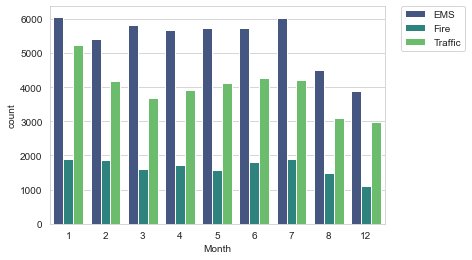

In [39]:
# Countplot is done as per months, we can notice that there is missing data in the months of september, october and november 
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
# The data is grouped by month based on the number of calls made, each call represents a row in the data so we can use count function for the total number of calls per month.
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,description,zip,title,timeStamp,township,address,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

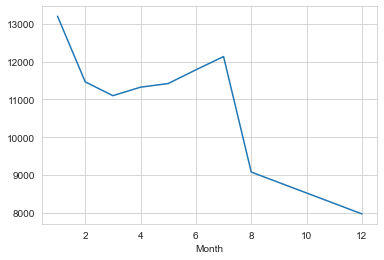

In [41]:
# A graph is plotted based on the number of calls per month from the group by table
byMonth['Reason'].plot()

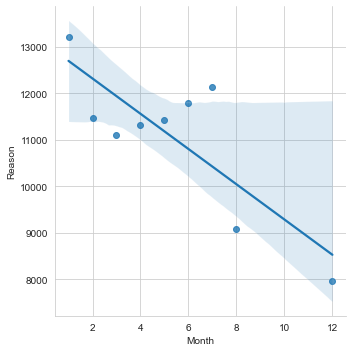

In [43]:
# A linear plot is created using seaborn library so that we can fit in the missing values 
sns.lmplot(x='Month',y='Reason',data=byMonth.reset_index())

In [44]:
# A new column called date is created by extracting information from timestamp
df['Date']=df['timeStamp'].apply(lambda t: t.date())

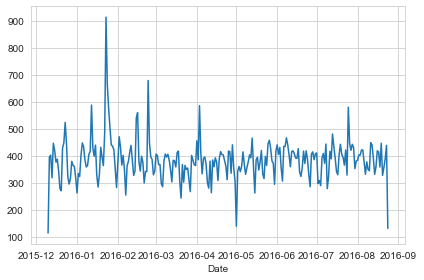

In [46]:
# A graph is plotted by counting the number of calls per date
df.groupby('Date').count()['Reason'].plot()
plt.tight_layout()

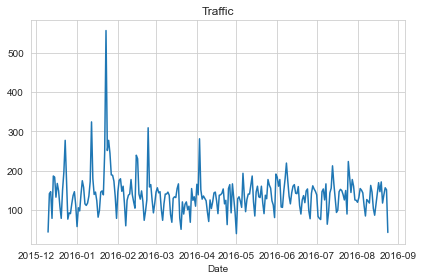

In [47]:
# The number of calls per date is filterded down as per traffic accidents. There is spike in traffic related calls in january whose reason can be investigated upon gaining more data
df[df['Reason']=='Traffic'].groupby('Date').count()['Reason'].plot()
plt.title('Traffic')
plt.tight_layout()

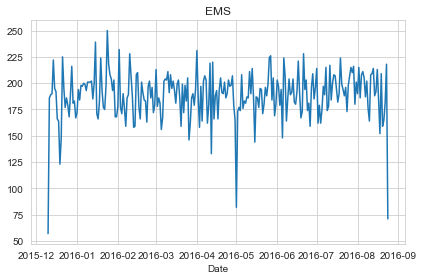

In [49]:
# The EMS related calls remained similar throughout and there is sharp decline in the monts of december, may and september
df[df['Reason']=='EMS'].groupby('Date').count()['Reason'].plot()
plt.title('EMS')
plt.tight_layout()

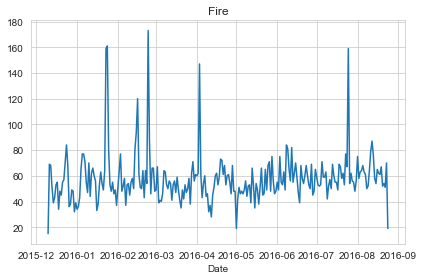

In [50]:
# In the Fire related emergency calls there is a sharp increase in january, february, april and september
df[df['Reason']=='Fire'].groupby('Date').count()['Reason'].plot()
plt.title('Fire')
plt.tight_layout()

In [51]:
# A new table is created using group by function which gives us number of calls at a particular hour on each day of week
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

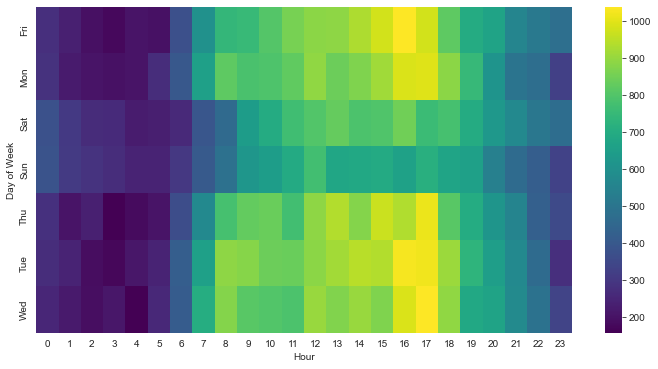

In [52]:
# A heatmap is created using seaborn based on the above table
# From the map we can see that the number of calls were more during evening on weekdays followed by morning hours on weekdays
# We can understand that people will be travelling for work on weekdays where the traffic calls add up, since the number of ems and fire calls are similar throughout judging from the bar graphs
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

In [ ]:
# A meaningfull insight of the data is gained by performing analysis and few questions are answered.